# LGMVIP Task 6 - Prediction using Decision Tree Algorithm

### Importing the necessary libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [7]:
df = pd.read_csv('Iris.csv')
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### EDA - Data Summarizarion

In [8]:
df.shape

(150, 5)

In [9]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [14]:
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### Visualizing the data

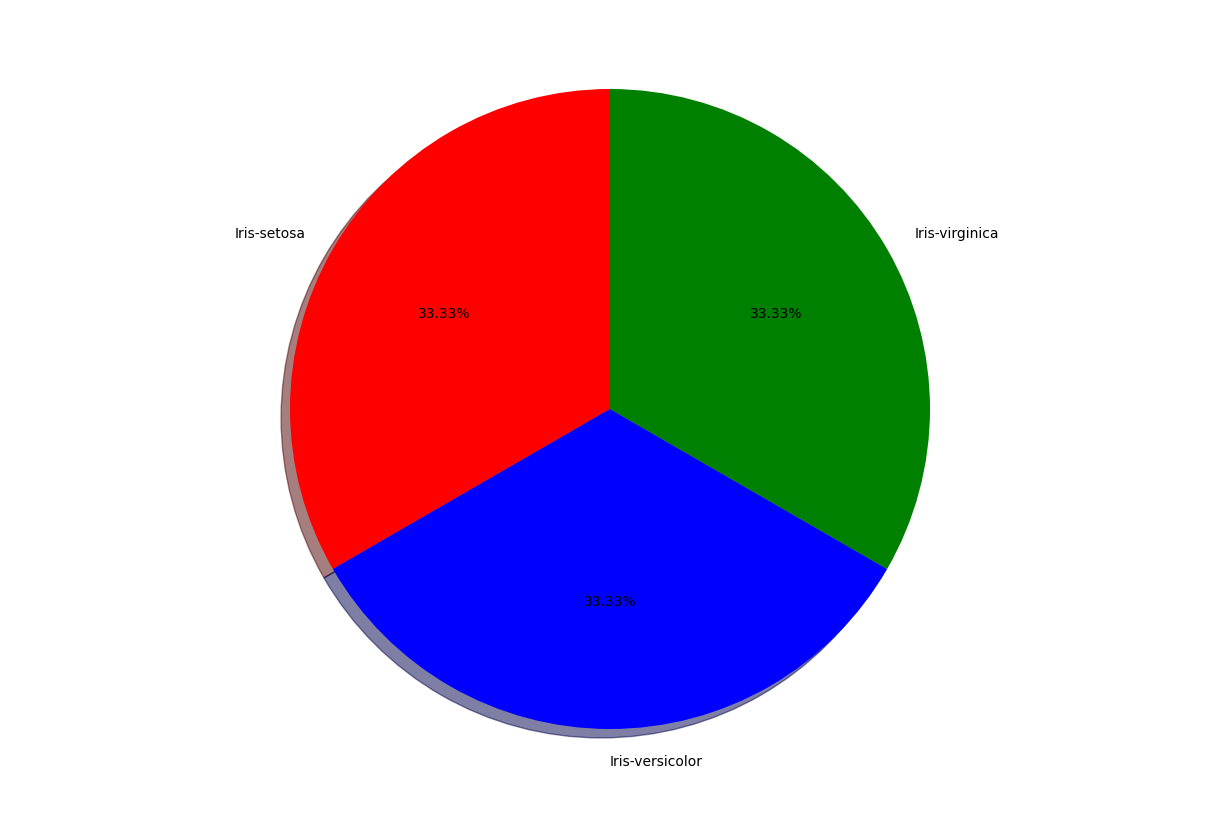

In [17]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
colors = ['red', 'blue', 'green']
sp = df['Species'].unique()
ct = df['Species'].value_counts().tolist()
ax.pie(ct, labels=sp, autopct='%1.2f%%', colors=colors, shadow=True, startangle=90)
plt.show()

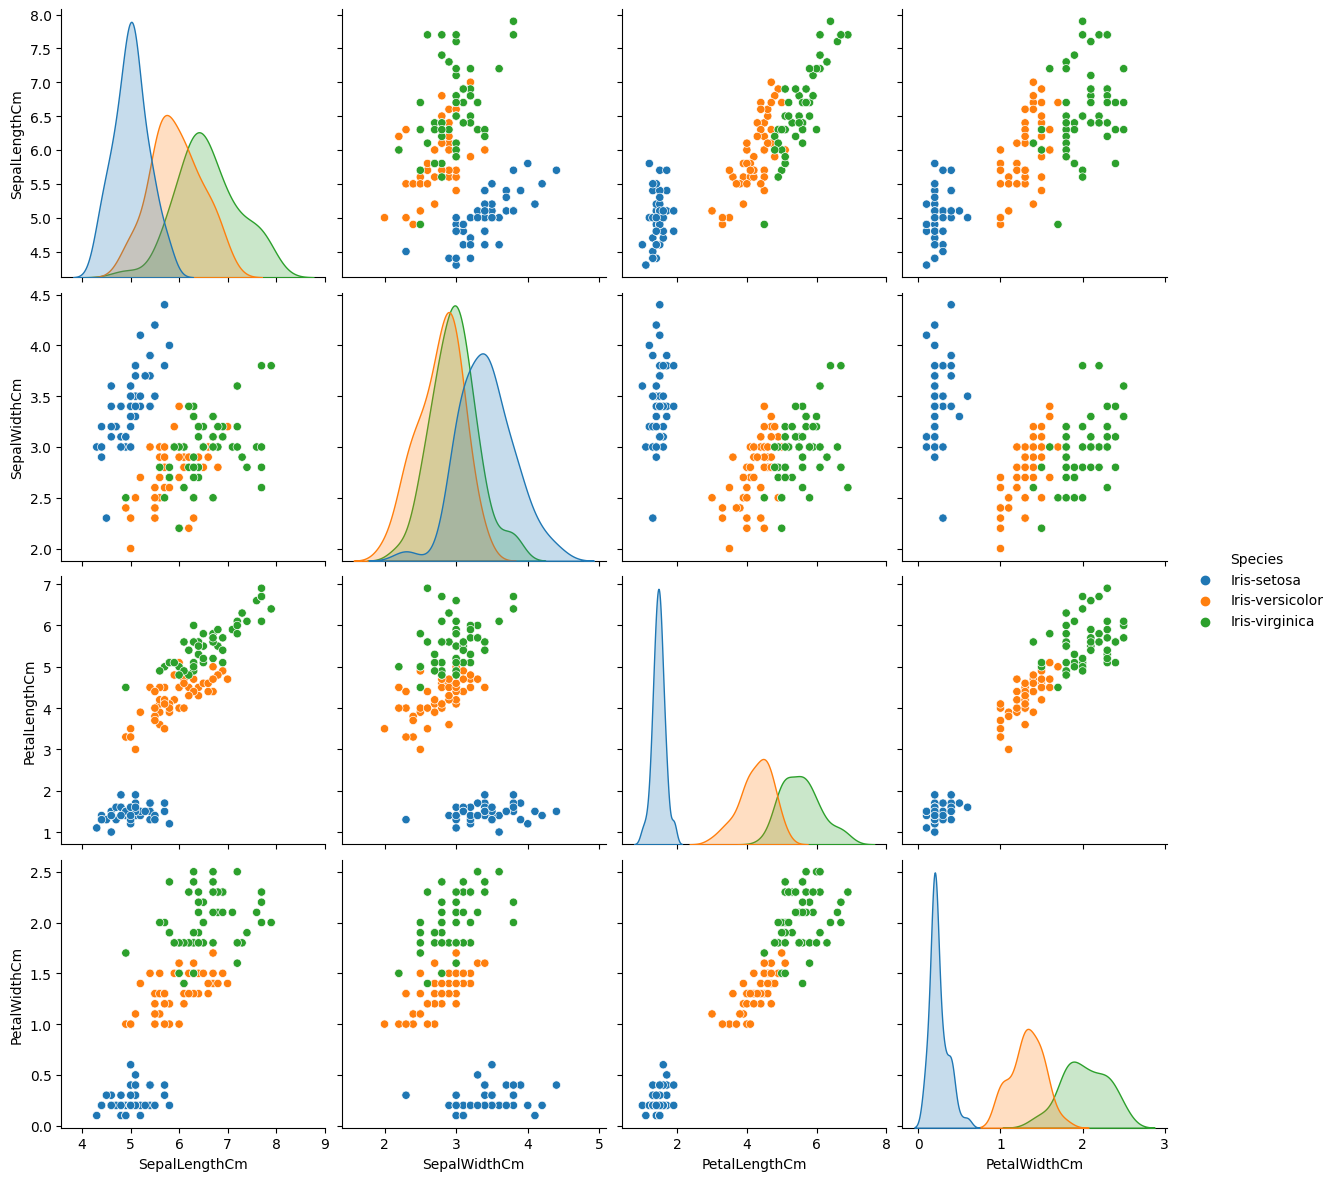

In [18]:
sns.pairplot(df, hue='Species', height=3)
plt.show()

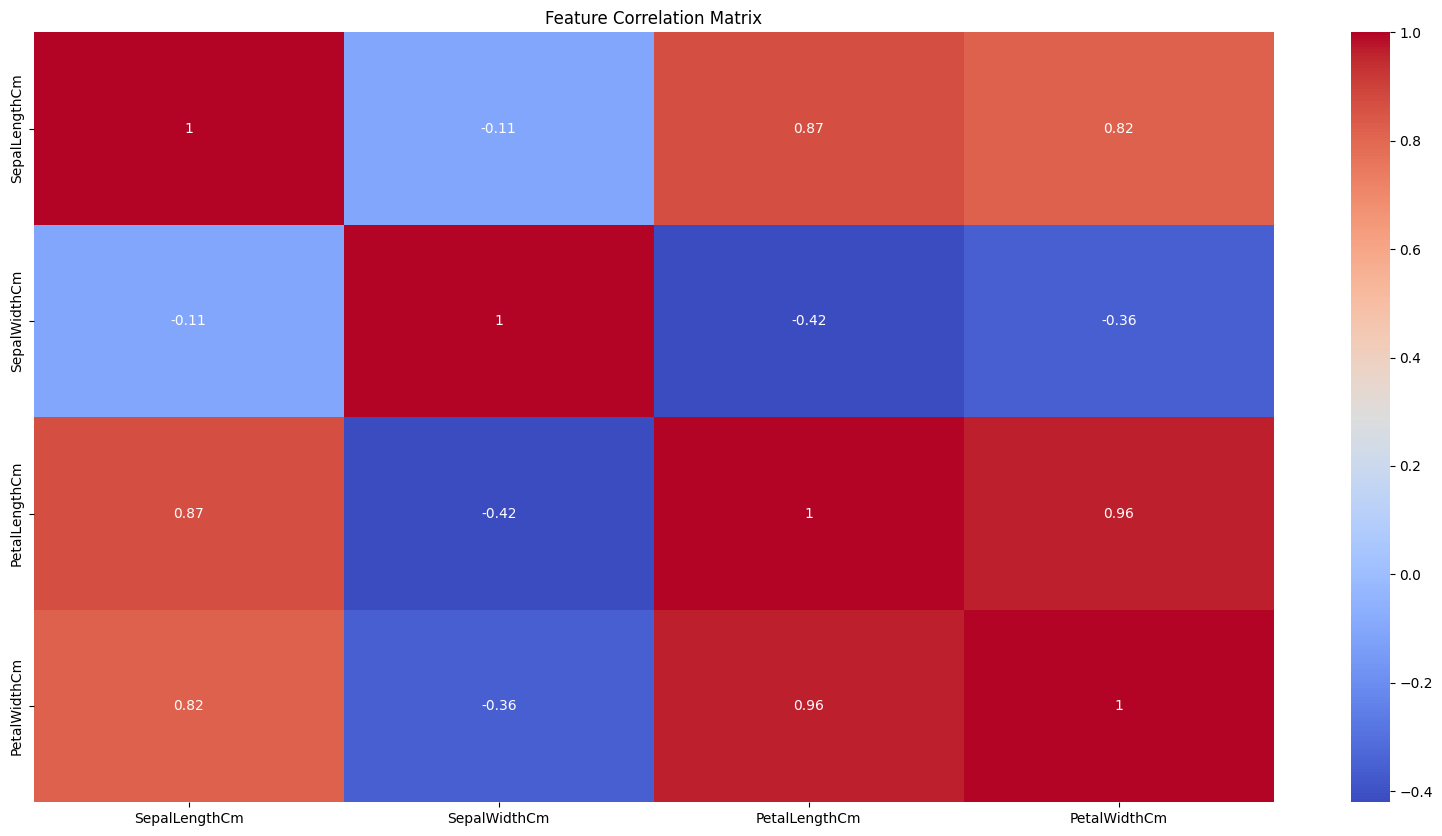

In [19]:
plt.figure(figsize=(20,10))
corr_mat = df.corr()
cm = sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
cm.set_title("Feature Correlation Matrix")
plt.show()

### Splitting the data into training and test sets

In [20]:
X = df.drop(["Species"], 1)
y = df['Species']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8


In [23]:
y_train.head()

60     Iris-versicolor
116     Iris-virginica
144     Iris-virginica
119     Iris-virginica
108     Iris-virginica
Name: Species, dtype: object

### Training the Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=20)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=20)

### Evaluating the Decision Tree Classifier

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy}")

Accuracy:0.9777777777777777


In [26]:
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")

Confusion Matrix: 
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [27]:
print(f"Classification Report: \n\n{classification_report(y_test, y_pred)}")

Classification Report: 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



### Visualizing the Decision Tree Classifier

In [28]:
features = df.columns[:-1]
classes = df['Species'].unique().tolist()

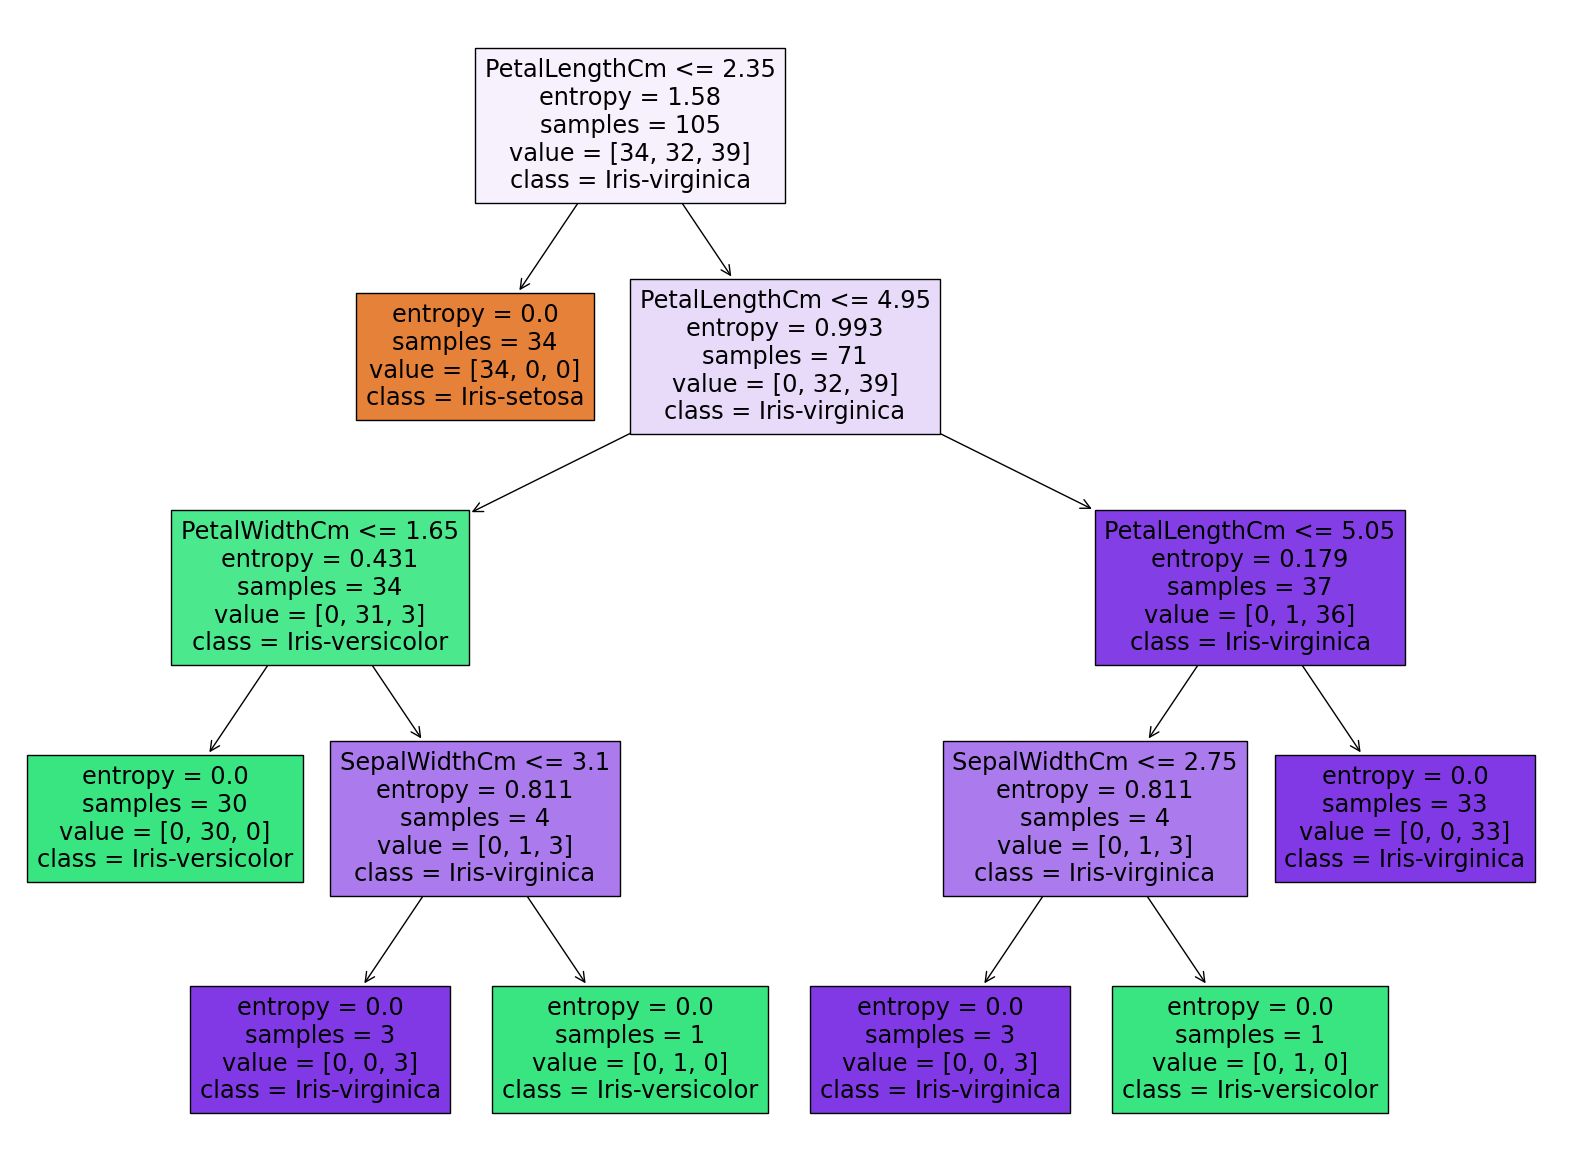

In [29]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(classifier,feature_names=features, class_names=classes, filled=True)
plt.show()

### Testing Predictions on Sample Data

In [30]:
test_pred1 = classifier.predict([[4.5, 3.3, 1.6, 0.3]])
print(test_pred1[0])

Iris-setosa


**The classifier predicted 'Setosa' as the species.**

In [31]:
test_pred2 = classifier.predict([[6.5, 4.5, 4.6, 2.5]])
print(test_pred2[0])

Iris-versicolor


**The classifier predicted 'Versicolor' as the species.**

In [33]:
test_pred3 = classifier.predict([[7.1, 7.5, 8.8, 3.6]])
print(test_pred3[0])

Iris-virginica


**The classifier predicted 'Virginica' as the species.**